<a href="https://colab.research.google.com/github/errasti13/flowINN/blob/master/jupyterNotebooks/FlowOverAirfoil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/errasti13/flowINN.git

Cloning into 'flowINN'...
remote: Enumerating objects: 704, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 704 (delta 4), reused 0 (delta 0), pack-reused 688 (from 1)
Receiving objects: 100% (704/704), 250.54 KiB | 11.93 MiB/s, done.
Resolving deltas: 100% (418/418), done.


In [2]:
%cd flowINN

/content/flowINN


In [3]:
pip install .

Processing /content/flowINN
  Preparing metadata (setup.py) ... done
  Created wheel for flowinn: filename=flowinn-0.1.0-py3-none-any.whl size=27724 sha256=0a3735392b4be15159164ab54d878c227e595b2a1a7e8ea0281eba943fc493b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-sk2xdbl6/wheels/0e/8d/aa/5d2b01326b534c78d3463a1cc89fd8d09ed9bea764004043c1
Successfully built flowinn


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 20)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 40)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 60)                  │           2,460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 40)                  │           2,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 3)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,683 (26.11 KB)

 Trainable params: 6,683 (26.11 KB)

 Non-trainable params: 0 (0.00 B)

Generating mesh...
Starting training...
Epoch 100: Loss = 0.009493994526565075
Epoch 200: Loss = 0.006445678882300854
Epoch 300: Loss = 0.004785414785146713
Epoch 400: Loss = 0.003886935766786337
Epoch 500: Loss = 0.0034339053090661764
Epoch 600: Loss = 0.0032319463789463043
Epoch 700: Loss = 0.008156000636518002
Epoch 800: Loss = 0.003115271218121052
Epoch 900: Loss = 0.0030638566240668297
Epoch 1000: Loss = 0.0030287159606814384
Epoch 1100: Loss = 0.003000469645485282
Epoch 1200: Loss = 0.0029764887876808643
Epoch 1300: Loss = 0.0029556036461144686
Epoch 1400: Loss = 0.002975073643028736
Epoch 1500: Loss = 0.0029438361525535583
Epoch 1600: Loss = 0.0029236087575554848
Epoch 1700: Loss = 0.0029145691078156233
Epoch 1800: Loss = 0.0028956385795027018
Epoch 1900: Loss = 0.0028800650034099817
Epoch 2000: Loss = 0.0029736387077718973
Epoch 2100: Loss = 0.002869766904041171
Epoch 2200: Loss = 0.0028513420838862658
Epoch 2300: Loss = 0.0028354183305054903
Epoch 2400: Loss = 0.00286416709423

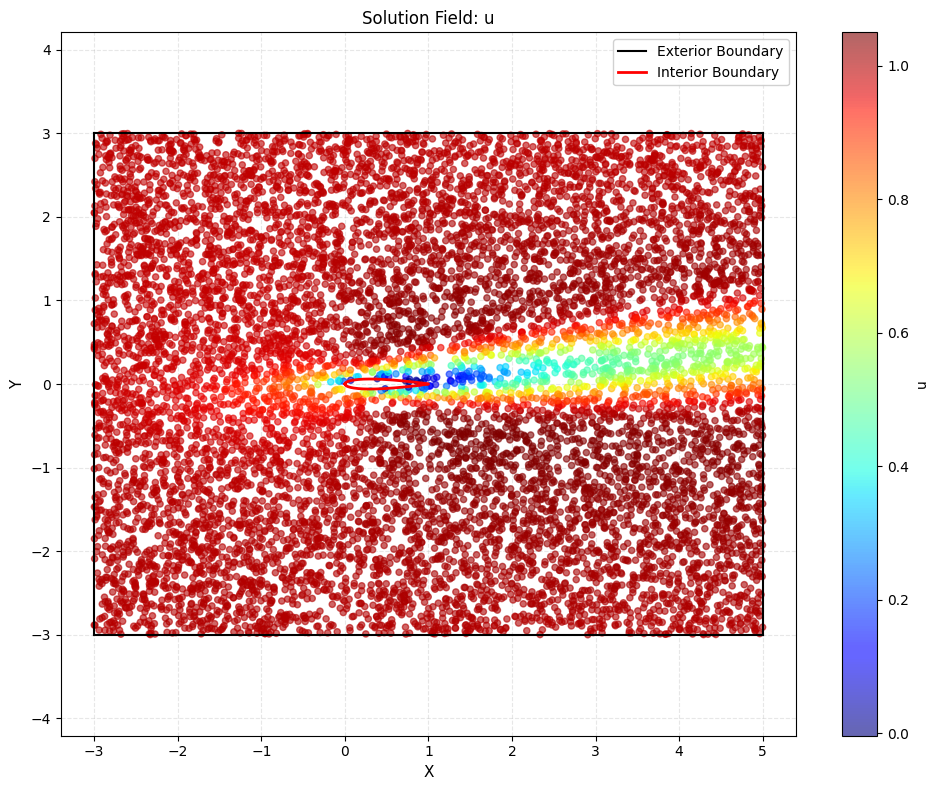

<Figure size 640x480 with 0 Axes>

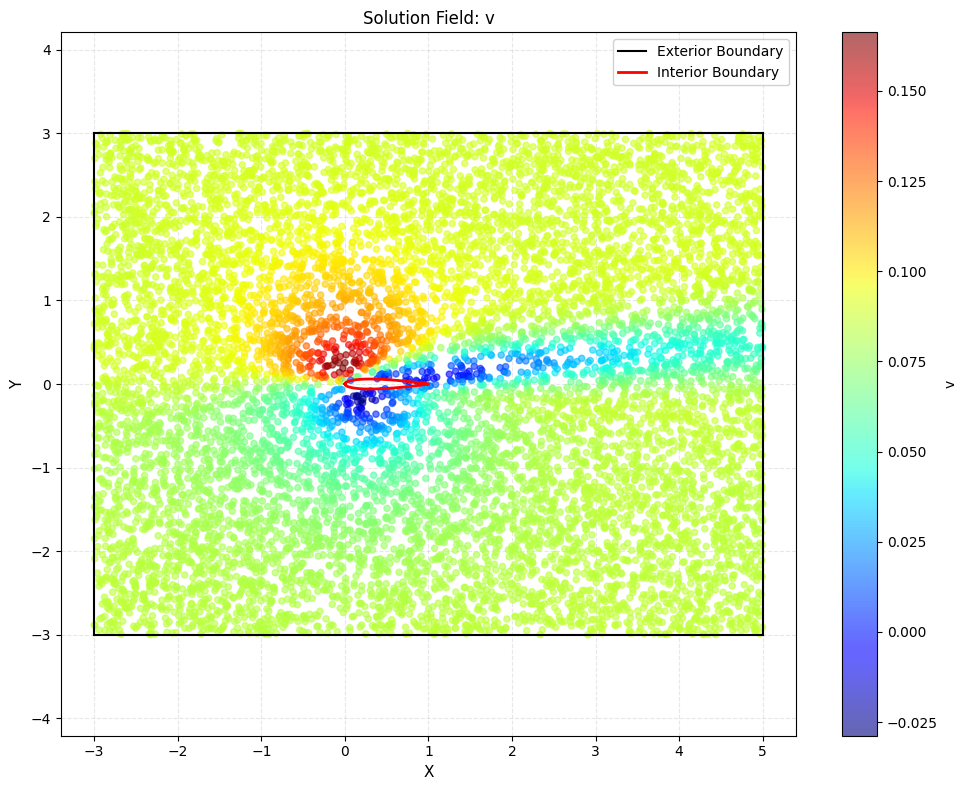

<Figure size 640x480 with 0 Axes>

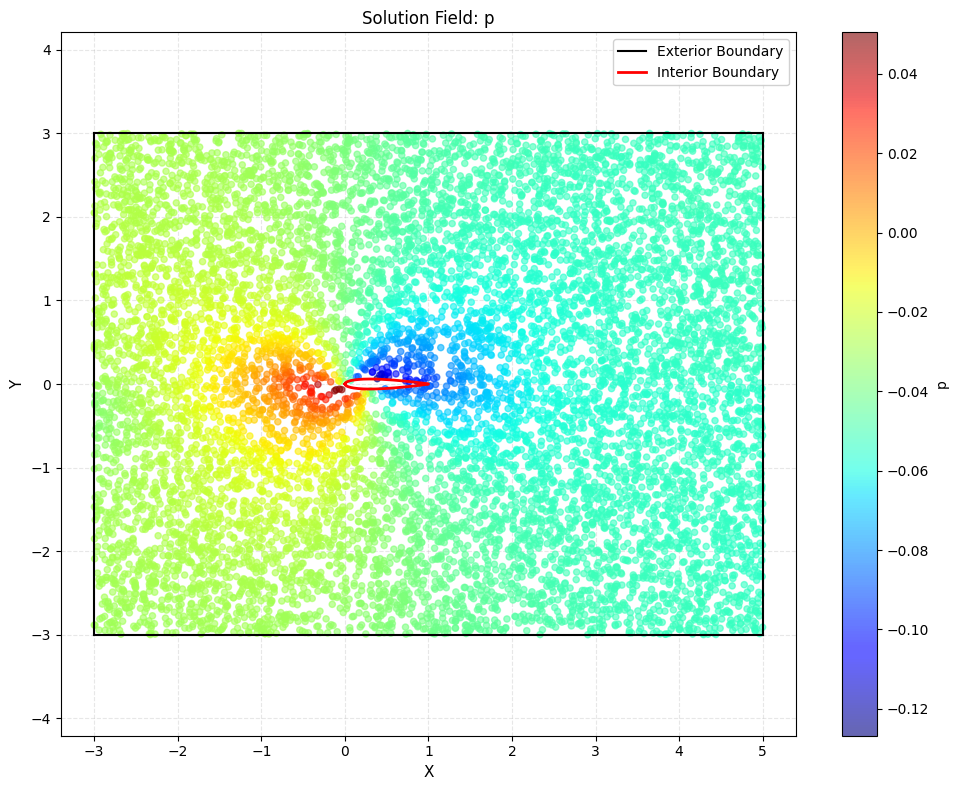

<Figure size 640x480 with 0 Axes>

Simulation completed successfully!


In [ ]:
from flowinn.tests.FlowOverAirfoil import FlowOverAirfoil

def main():
    # Domain setup
    x_range = (-3.0, 5.0)
    y_range = (-3.0, 3.0)
    angle_of_attack = 5.0  # degrees

    # Simulation parameters
    case_name = "FlowOverAirfoil"
    epochs = 10000
    print_interval = 100
    autosave_interval = 1000

    # Mesh parameters
    nx = 100
    ny = 100
    n_boundary = 100

    trainedModel = False

    try:
        # Initialize simulation
        airfoil = FlowOverAirfoil(case_name, x_range, y_range, AoA=angle_of_attack)

        # Generate mesh
        print("Generating mesh...")
        airfoil.generateMesh(Nx=nx, Ny=ny, NBoundary=n_boundary, sampling_method='random')

        # Train the model
        if trainedModel:
            print("Loading pre-trained model...")
            airfoil.load_model()
        else:
            print("Starting training...")
            airfoil.train(epochs=epochs,
                        print_interval=print_interval,
                        autosaveInterval=autosave_interval)

        # Predict and visualize
        print("Predicting flow field...")
        airfoil.predict()

        # Plot results
        print("Generating plots...")
        airfoil.plot(solkey='u')
        airfoil.plot(solkey='v')
        airfoil.plot(solkey='p')

        print("Simulation completed successfully!")

    except Exception as e:
        print(f"Error during simulation: {str(e)}")
        raise

if __name__ == "__main__":
    main()